In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'C:\Users\Emincan\Desktop\Playground\train.csv')
test = pd.read_csv(r'C:\Users\Emincan\Desktop\Playground\test.csv')
sub = pd.read_csv(r'C:\Users\Emincan\Desktop\Playground\sample_submission.csv')

test_ids = test['id']

train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
train.shape

(74051, 10)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [5]:
train.drop('id' , axis = 1 , inplace = True)
test.drop('id' , axis = 1 , inplace = True)

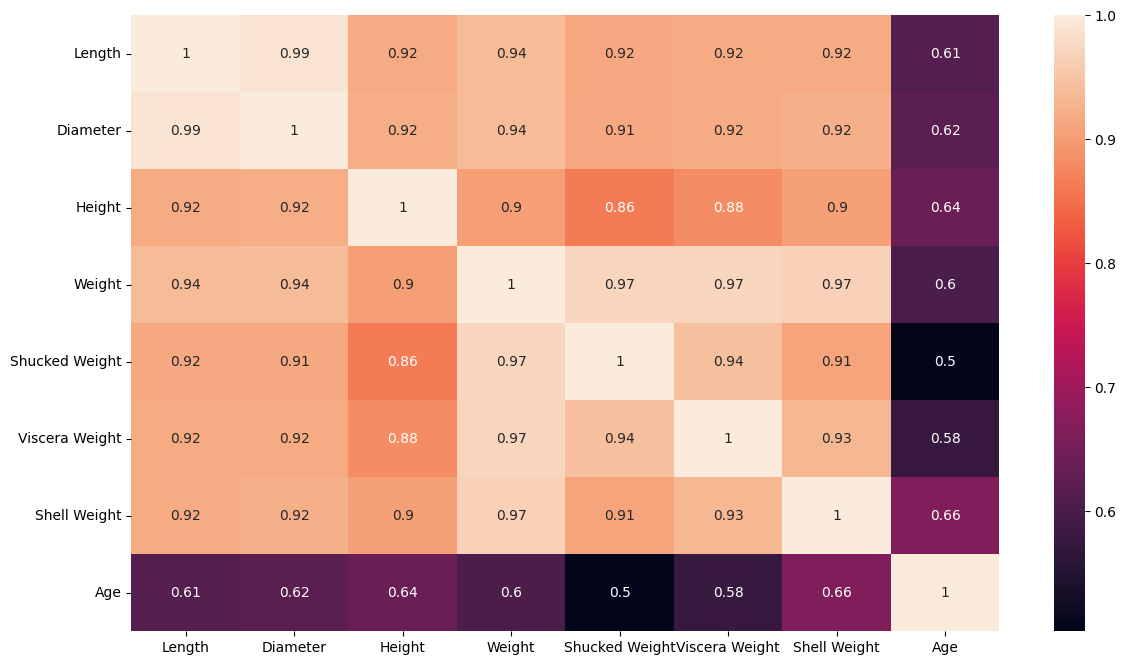

In [6]:
plt.figure(figsize=(14,8) ,dpi=100)

sns.heatmap(train.corr(numeric_only=True) , annot = True);

# Utils

In [7]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE , ADASYN



class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Fertility'
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model' , task = 'reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        
        if task == 'class':
            print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
            print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}')
            print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
            print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Test Precision : {precision_score(y_test , y_pred, pos_label=1)}')
            print(f'{name} Test F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test R2 : {r2_score(y_test , y_pred)}')
            print(f'{name} Test Mae : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Test RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
            print(f'{name} Test MSE : {mean_squared_error(y_test , y_pred)}')
        
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true,y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true,y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)
        
        
    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true , y_pred)    
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred):
        return roc_auc_score(y_true, y_pred, pos_label=1)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
        
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))         
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Datamızın task'i, 'reg' or 'class'
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)

    # Fonksiyonun özeti
    def summary(df):
        # Print the shape of the DataFrame
        print(f'data shape: {df.shape}')  
        # Create a summary DataFrame
        summ = pd.DataFrame(df.dtypes, columns=['data type'])
        # Calculate the number of missing values
        summ['#missing'] = df.isnull().sum().values 
        # Calculate the percentage of missing values
        summ['%missing'] = df.isnull().sum().values / len(df)* 100
        # Calculate the number of unique values
        summ['#unique'] = df.nunique().values
        # Create a descriptive DataFrame
        desc = pd.DataFrame(df.describe(include='all').transpose())
        # Add the minimum, maximum, and first three values to the summary DataFrame
        summ['min'] = desc['min'].values
        summ['max'] = desc['max'].values
        summ['first value'] = df.loc[0].values
        summ['second value'] = df.loc[1].values
        summ['third value'] = df.loc[2].values
        
        # Return the summary DataFrame
        return summ
    
    def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Train correlation') -> None:
        corr = df.corr(numeric_only = True)  
        fig, axes = plt.subplots(figsize=(14, 8))
        mask = np.zeros_like(corr)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
        plt.title(title_name)
        plt.show()

    # # plot_correlation_heatmap(original, 'Original Dataset Correlation')
    # plot_correlation_heatmap(train, 'Train Dataset Correlation')

# Which Tactics ?

In [8]:
class CFG:
    """
    Class'ın amacı:
    - Feature engineering aşamasını aç-kapa formatına dönüştürerek bug azaltmak
    - Nihai çözümümde bazı featurelar olmasa dahi deneme yapılan feature kapsamını genişletmek/gösterebilmek.
    """
    
    target = 'Age'
    train_path = r'C:\Users\Emincan\Desktop\Playground\train.csv'
    submission_path = '/kaggle/input/gdz-elektrik-datathon-2023/sample_submission.csv'
    read_from_path = True
    
    #Hangi dataların kullanılacağına karar verme
    cat = True
    sexDummy = False
    weightAverage = False
    
    
    #Feature türlerine karar verme
    production_lag_features = True
    consumption_lag_features = False
    diff_pct_features = False
    weather_lag_features = True
    solar_lag_features = True
    rolling_features = False
    rolling_shift_features = False
    
    #Feature parametreleri
    nasa_feature_columns =  ['T2M','T2MDEW','T2MWET','QV2M','RH2M','PRECTOTCORR','PS','WS10M','WD10M','WS50M']
    meteostat_feature_columns = ['dwpt','rhum','prcp','wdir','wspd','pres','coco']
    production_base_columns = ['fueloil','gasOil','blackCoal','lignite','geothermal','naturalGas','river','dammedHydro','lng','biomass','importCoal','asphaltiteCoal','wind','sun','importExport','wasteheat','total']
    consumption_base_columns = ['consumption']
    weather_lag_range = np.arange(0,51,5)
    rolling_range = np.arange(0,48,6)[1:]
    roll_types = ['mean','std','min','max']

# Use Tactics

In [9]:
if CFG.sexDummy:
    train = pd.get_dummies(train, columns= ['Sex'])
    test = pd.get_dummies(test, columns= ['Sex'])

if CFG.cat:
    train['Sex'] = train['Sex'].astype('category')
    test['Sex'] = test['Sex'].astype('category')

if CFG.weightAverage:
    pass

In [10]:
fonks.summary(train)

data shape: (74051, 9)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
Sex,object,0,0.0,3,NaN,NaN,I,I,M
Length,float64,0,0.0,144,0.1875,2.012815,1.525,1.1,1.3875
Diameter,float64,0,0.0,122,0.1375,1.6125,1.175,0.825,1.1125
Height,float64,0,0.0,65,0.0,2.825,0.375,0.275,0.375
Weight,float64,0,0.0,3096,0.056699,80.101512,28.973189,10.418441,24.777463
Shucked Weight,float64,0,0.0,1766,0.028349,42.184056,12.728926,4.521745,11.3398
Viscera Weight,float64,0,0.0,967,0.042524,21.54562,6.647958,2.324659,5.556502
Shell Weight,float64,0,0.0,1048,0.042524,28.491248,8.348928,3.40194,6.662133
Age,int64,0,0.0,28,1.0,29.0,9,8,9


# Distributions

In [ ]:
#...

# Correlations

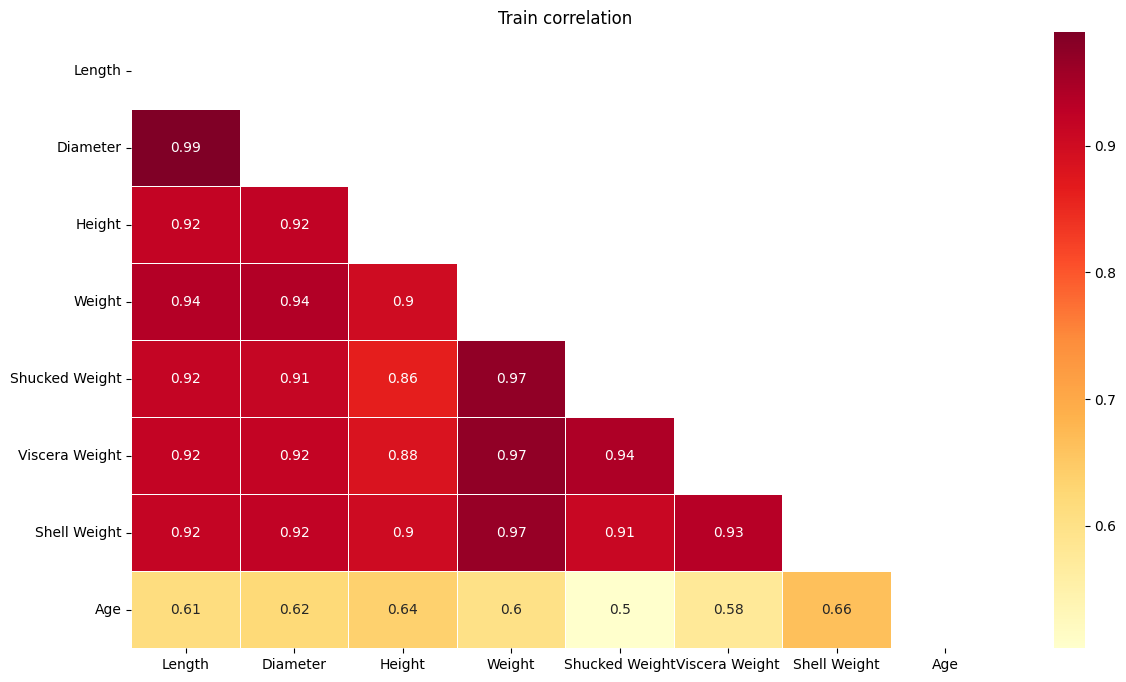

In [11]:
fonks.plot_correlation_heatmap(train)

# Preprocess and Modelling

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

cv_scores = list()
importance_gb = list()

# Assuming 'train_df' is your DataFrame, and 'Age' is your target column
X = train.drop('Age', axis=1)
Y = train['Age']

if CFG.cat:
    # Preprocess categorical columns
    cat_cols = ['Sex']  # fill in the list of your categorical variables
    num_cols = []  # fill in the list of your numerical variables

    for c in cat_cols:
        X[c] = X[c].astype('category')
        X[c] = X[c].cat.codes
else:
    pass

## Running 3-fold CV
for i in range(3):
    print(f'\nFold {i+1} CV begins')
    skf = KFold(n_splits=3, random_state=np.random.randint(0, 999), shuffle=True)

    for train_ix, test_ix in skf.split(X, Y):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

        GB_md = GradientBoostingRegressor(
                loss='absolute_error',
                max_features=None,
                max_depth=6,
                learning_rate=0.01,
                n_estimators=1500,
                subsample=0.9,
                ).fit(X_train, Y_train)
        importance_gb.append(GB_md.feature_importances_)
        
        GB_pred_1 = np.round(GB_md.predict(X_test))
        mae = mean_absolute_error(Y_test, GB_pred_1)
        cv_scores.append(mae)
        print(f'Fold {i+1} CV done. MAE: \033[1;36m{mae:.5f}\033[0m')

    

scores = np.mean(cv_scores)    
print(f'\nThe average MAE over 3-folds (run 3 times) is: \033[1;36m{scores:.5f}\033[0m')


Fold 1 CV begins
Fold 1 CV done. MAE: 1.34427
Fold 1 CV done. MAE: 1.35537
Fold 1 CV done. MAE: 1.34809

Fold 2 CV begins
Fold 2 CV done. MAE: 1.34585
Fold 2 CV done. MAE: 1.34229
Fold 2 CV done. MAE: 1.36150

Fold 3 CV begins
Fold 3 CV done. MAE: 1.34131
Fold 3 CV done. MAE: 1.33317
Fold 3 CV done. MAE: 1.36722

The average MAE over 3-folds (run 3 times) is: 1.34879


# Evaluation

C:\Users\Emincan\AppData\Local\Temp\ipykernel_9848\1861731108.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('YlOrRd')


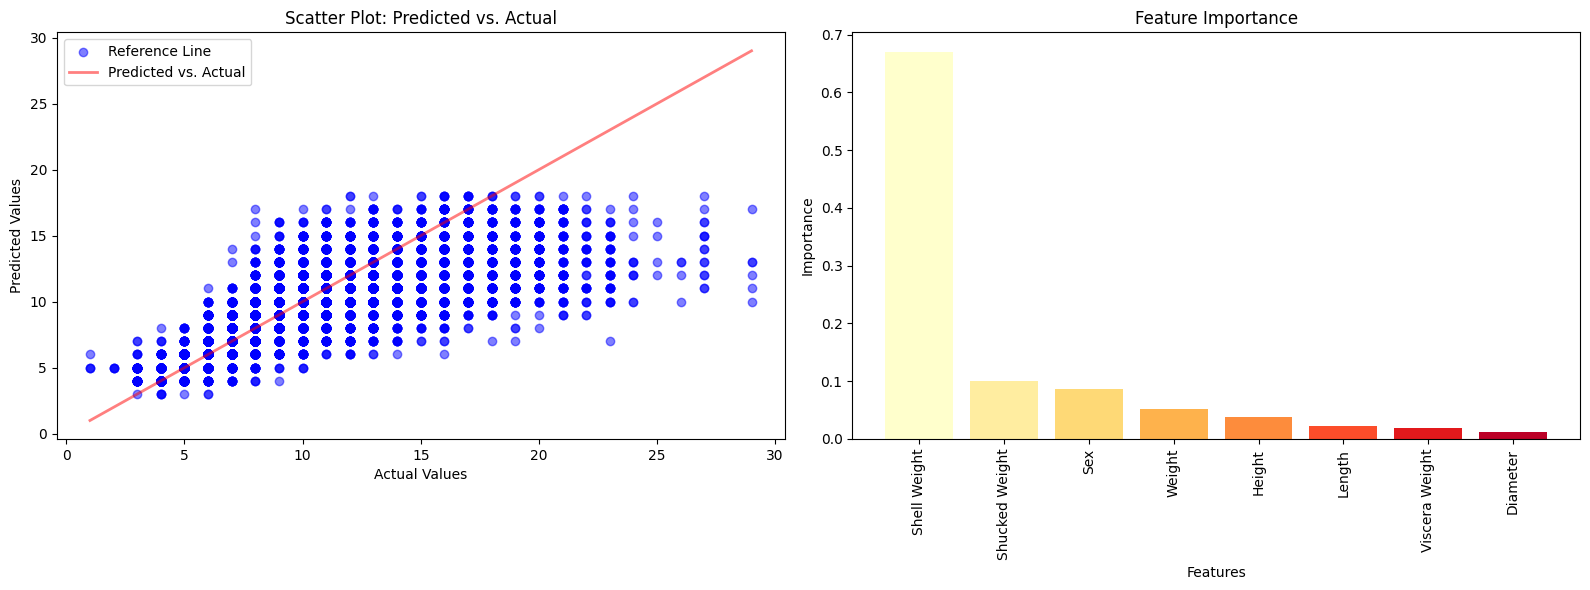

In [16]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming importance_xgb contains the feature importances from the XGB model
# Assuming preds contains the predictions from the XGB model

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of actual values vs predicted values
axes[0].scatter(Y_test, GB_pred_1, color='blue', label='Actual', alpha=0.5)
axes[0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', alpha=0.5, linewidth=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Scatter Plot: Predicted vs. Actual')
axes[0].legend(['Reference Line', 'Predicted vs. Actual'])

# Feature Importance visualization
importance_xgb_avg = np.mean(importance_gb, axis=0)
sorted_feature_indices = np.argsort(importance_xgb_avg)[::-1]
sorted_feature_names = [X.columns[i] for i in sorted_feature_indices]
sorted_importance = importance_xgb_avg[sorted_feature_indices]

color_map = cm.get_cmap('YlOrRd')
colors = color_map(np.arange(len(sorted_feature_names)) / len(sorted_feature_names))

axes[1].bar(range(len(sorted_feature_names)), sorted_importance, color=colors)
axes[1].set_xticks(range(len(sorted_feature_names)))
axes[1].set_xticklabels(sorted_feature_names, rotation='vertical')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Importance')
axes[1].set_title('Feature Importance')

plt.tight_layout()
plt.show()

# Final Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Assuming 'train_df' is your DataFrame, and 'Age' is your target column
X_train = train.drop('Age', axis=1)
Y_train = train['Age']

if CFG.cat:
    # Preprocess categorical columns
    cat_cols = ['Sex']  # fill in the list of your categorical variables
    num_cols = []  # fill in the list of your numerical variables

    for c in cat_cols:
        X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].cat.codes
else:
    pass

GB_md = GradientBoostingRegressor(
    loss='absolute_error',
    max_features=None,
    max_depth=6,
    learning_rate=0.01,
    n_estimators=1500,
    subsample=0.9,
)

GB_md.fit(X_train, Y_train)

# Predict on the entire training set
train_predictions = GB_md.predict(X_train)

# Calculate the mean absolute error on the entire training set
mae = mean_absolute_error(Y_train, train_predictions)
print(f'Training MAE: {mae:.5f}')


In [23]:
X_test

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
7,1,1.3125,1.0250,0.3500,18.299602,8.249704,3.898056,5.669900
8,0,1.6000,1.2875,0.4375,38.824640,16.967176,7.413394,10.772810
9,2,1.0250,0.7625,0.2625,10.305043,4.493396,2.126212,2.976698
...,...,...,...,...,...,...,...,...
74045,0,1.6250,1.4125,0.4875,49.874538,23.005619,10.248344,11.481547
74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687
74048,0,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607
74049,1,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             49368 non-null  object 
 1   Length          49368 non-null  float64
 2   Diameter        49368 non-null  float64
 3   Height          49368 non-null  float64
 4   Weight          49368 non-null  float64
 5   Shucked Weight  49368 non-null  float64
 6   Viscera Weight  49368 non-null  float64
 7   Shell Weight    49368 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.0+ MB


In [25]:
cat_cols = ['Sex']  # fill in the list of your categorical variables
num_cols = []  # fill in the list of your numerical variables

for c in cat_cols:
    test[c] = test[c].astype('category')
    test[c] = test[c].cat.codes

In [26]:
gb_preds1 = np.round(GB_md.predict(test))

In [27]:
gb_preds1

array([ 7.,  8., 10., ..., 12., 10., 12.])

In [28]:
sub['Age'] = gb_preds1

In [ ]:
sub.to_csv('preds/gb_preds1.csv', index=False)